# SMS Spam Collection Data set

### Data Set Information:

A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which         cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message               received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it         involved carefully scanning hundreds of web pages.
A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000             legitimate messages collected for research at the Department of Computer Science at the National University of Singapore.       The messages largely originate from Singaporeans and mostly from students attending the University. These messages were         collected from volunteers who were made aware that their contributions were going to be made publicly available.
A list of 450 SMS ham messages collected from Caroline Tag's PhD.
Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages.
    
### Attribute Information:

    The collection is composed by just one text file, where each line has the correct class followed by the raw message. We         offer some examples bellow:

    * ham What you doing?how are you?
    * ham Ok lar... Joking wif u oni...
    * ham dun say so early hor... U c already then say...
    * ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
    * ham Siva is in hostel aha:-.
    * ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
    * spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
    * spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
    * spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU

    Note: the messages are not chronologically sorted.

# 1.Loading the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_sms=pd.read_csv("SMSSpamCollection",sep="\t",names=['target','message'])
df_sms.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df_sms.columns

Index(['target', 'message'], dtype='object')

In [5]:
print(df_sms.shape)
print("Number of Rows : ",df_sms.shape[0])
print("Number of Columns : ",df_sms.shape[1])

(5572, 2)
Number of Rows :  5572
Number of Columns :  2


# 2. Exploratory Data Analysis

In [6]:
df_sms['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

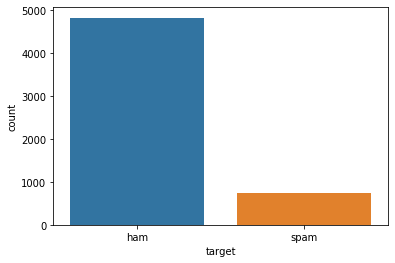

In [7]:
sns.countplot(x='target',data=df_sms)

In [8]:
from wordcloud import WordCloud, STOPWORDS

In [9]:
df = df_sms.loc[df_sms['target']=='spam', :]

df.head()

,target,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [10]:
df['target'].value_counts()

spam    747
Name: target, dtype: int64

In [11]:
word=' '.join(df['message'])
print(word[:2000])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or clic

In [12]:
df = df_sms.loc[df_sms['target']=='spam', :]

words=' '.join(df['message'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                            and word!='call'
                            ])

In [13]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1500,
                      height=800
                     ).generate(cleaned_word)

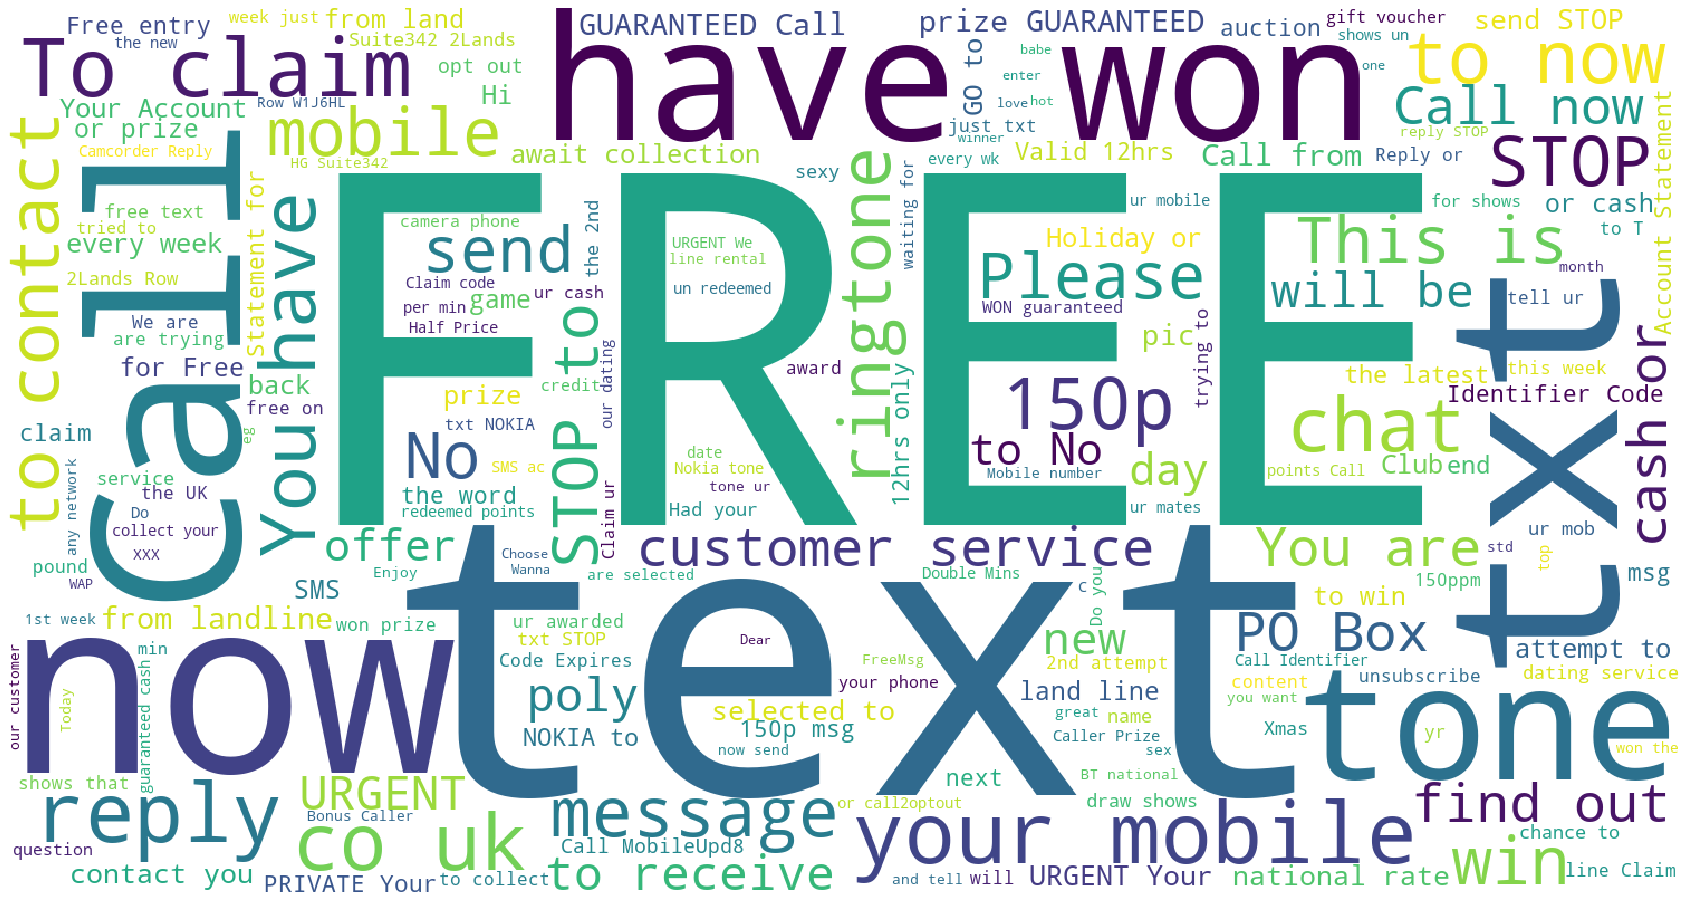

In [14]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 3.Data Preprocessing

In [15]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [16]:
#initialise inbuilt Lemmatizer
lemmatizer = WordNetLemmatizer()

In [17]:
#initialise two empty lists
clean_sms_lst=[]
sms_len_lst=[]

In [18]:
def preprocess(raw_sms):
    #Remove all special characters and digits
    letters_only=re.sub("[^a-zA-Z]"," ",raw_sms)
    
    #convert sentence to lower case
    letters_only=letters_only.lower()
    
    #tokenize into words
    words=letters_only.split()
    
    #Remove Stop Words
    words=[w for w in words if not w in stopwords.words("english")]
    
    #Lemmatization
    words=[lemmatizer.lemmatize(word) for word in words]

    clean_sms_lst.append(" ".join(words))
    
    sms_len_lst.append(len(words))

In [19]:
from tqdm import tqdm,tqdm_notebook
tqdm.pandas()

In [20]:
clean_sms_lst=[]
sms_len_lst=[]
df_sms['message'].progress_apply(lambda x : preprocess(x))
df_sms['clean_sms_lema']=clean_sms_lst
df_sms['sms_len_lema']=sms_len_lst

100%|█████████████████████████████████████████████████████████████████████████████| 5572/5572 [00:21<00:00, 261.45it/s]


In [21]:
df_sms.head()

,target,message,clean_sms_lema,sms_len_lema
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,7


# 4. Data Preparation

In [22]:
df_sms['target_num']=df_sms['target'].apply(lambda x : 0 if x=='spam' else 1)
df_sms.head()

,target,message,clean_sms_lema,sms_len_lema,target_num
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16,1
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21,0
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,9,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,7,1


In [23]:
#splitting int train and test
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_sms, test_size=0.2, random_state=42)

In [24]:
train_clean_sms=[]
for sms in train['clean_sms_lema']:
    train_clean_sms.append(sms)
    
test_clean_sms=[]
for sms in test['clean_sms_lema']:
    test_clean_sms.append(sms)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(analyzer="word")
train_features=vectorizer.fit_transform(train_clean_sms)
test_features=vectorizer.transform(test_clean_sms)

In [26]:
vectorizer.vocabulary_

{'reply': 4463,
 'win': 6061,
 'weekly': 5997,
 'fifa': 1873,
 'world': 6134,
 'cup': 1228,
 'held': 2383,
 'send': 4727,
 'stop': 5170,
 'end': 1654,
 'service': 4746,
 'hello': 2387,
 'sort': 5024,
 'town': 5603,
 'already': 163,
 'dont': 1496,
 'rush': 4583,
 'home': 2445,
 'eating': 1594,
 'nacho': 3523,
 'let': 3004,
 'know': 2891,
 'eta': 1709,
 'come': 1041,
 'guoyang': 2289,
 'go': 2182,
 'tell': 5391,
 'told': 5554,
 'hey': 2401,
 'sathya': 4637,
 'till': 5514,
 'dint': 1433,
 'meet': 3293,
 'even': 1720,
 'single': 4883,
 'time': 5515,
 'saw': 4649,
 'situation': 4896,
 'orange': 3786,
 'brings': 691,
 'ringtones': 4532,
 'chart': 887,
 'hero': 2398,
 'free': 2016,
 'hit': 2416,
 'week': 5995,
 'pic': 3986,
 'wap': 5942,
 'receiving': 4384,
 'tip': 5518,
 'sitting': 4895,
 'mu': 3482,
 'waiting': 5920,
 'everyone': 1729,
 'get': 2139,
 'suite': 5248,
 'take': 5337,
 'shower': 4835,
 'finish': 1897,
 'liao': 3008,
 'urgent': 5789,
 'mobile': 3404,
 'awarded': 398,
 'bonus': 62

In [27]:
print("Total unique words : ",len(vectorizer.vocabulary_))
print("Type of Train features : ",type(train_features))
print("shape of train features : ",train_features.shape)

Total unique words :  6278
Type of Train features :  <class 'scipy.sparse.csr.csr_matrix'>
shape of train features :  (4457, 6278)


# 5. Train the Model and Evaluation

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [29]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC()]

In [30]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()

for classifier in tqdm(Classifiers):
    fit = classifier.fit(dense_features,train['target_num'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['target_num'])
    Con_metric=metrics.confusion_matrix(pred,test['target_num'])
    Class_metric=metrics.classification_report(pred,test['target_num'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    print('\nConfusion metrics of '+classifier.__class__.__name__+' is \n'+str(Con_metric))
    print('\nClassification report of '+classifier.__class__.__name__+' is \n\n'+str(Class_metric))

 33%|████████████████████████████                                                        | 1/3 [00:01<00:02,  1.39s/it]

Accuracy of LogisticRegression is 0.9847533632286996

Confusion metrics of LogisticRegression is 
[[132   0]
 [ 17 966]]

Classification report of LogisticRegression is 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       132
           1       1.00      0.98      0.99       983

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.97      1115
weighted avg       0.99      0.98      0.99      1115



 67%|████████████████████████████████████████████████████████                            | 2/3 [00:20<00:06,  6.65s/it]

Accuracy of DecisionTreeClassifier is 0.9757847533632287

Confusion metrics of DecisionTreeClassifier is 
[[130   8]
 [ 19 958]]

Classification report of DecisionTreeClassifier is 

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       138
           1       0.99      0.98      0.99       977

    accuracy                           0.98      1115
   macro avg       0.93      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:23<00:00, 27.81s/it]

Accuracy of SVC is 0.9847533632286996

Confusion metrics of SVC is 
[[132   0]
 [ 17 966]]

Classification report of SVC is 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       132
           1       1.00      0.98      0.99       983

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.97      1115
weighted avg       0.99      0.98      0.99      1115

